## Overview

The King County Housing Data Set provides information about houses in King County, including their size, location, condition, and other features. The objective of this project is to create a multiple regression model that can accurately predict the price of a house.

The project is commissioned by a commercial real estate company interested in purchasing homes within a specific area. Their main concerns revolve around obtaining predicted prices for homes in the area, and assessing any notable disparities between the actual prices and our model's predicted prices.    

## Business Understanding

The client's primary objective is to develop a platform that can offer precise house price estimates which are paramount for both buyers and sellers in King County.

In order to achieve this, we are required to come up with a model that is capable of deducing the main factors that influence the house prices. In order to train the model effectively, the client seeks to utilize accurate and representative data pertaining to the real estate market in King County. This data contains historical sales, current listings, size of the property and other pertinent features.

The model will be able to make precise estimations of a house's value based on its features upon successful training, the model can be seamlessly integrated into the platform, providing buyers and sellers with reliable estimates of house prices. The information drawn from the model will help both buyers and sellers to make well-informed decisions regarding property transactions.

Harnessing the power of technology by delivering a dependable and accurate platform for house buying and selling in King County, the client can establish themselves as a trusted source in the local real estate market which will then in turn attract a dedicated customer base.   

### Problem Statement

Riaor Real Estate faces challenge in effectively entering the dynamic King County real estate market due to the complex interplay of factors influencing housing prices and demand. Understanding the intricate relationship between property features,seasonal trends, and market dynamics is crucial for developing successful market penetration and growth strategies.  

### Objectives:  

1. **Identify key determinants of house prices:**
The goal is to determine which features of a house have the most significant impact on its price in King county.  

2. **Develop a Multiple Regression Model for Predicting House Prices:**   
Create a multiple linear regression model using the identified key determinants to predict the house prices. Evaluate the model's performance using appropriate metrics such as R-squared, RMSE, and MAE.   

3. **Assess Model Accuracy and Disparities:**   
Compare the predicted house prices with the actual prices to identify any notable disparities. Perform residual analysis to understand and address any systematic errors or biases in the model's predictions.  

4. **Provide Insights and Recommendations for Real Estate Decision-Making:**   
Generate actionable insights from the model's results to help the client make informed decisions about buying and selling houses in King County. Highlight the most influential factors and suggest strategies to maximize property value.

## Imports

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error


## Data Loading

In [105]:
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [106]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

## Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **Date** - house was sold
* **Price** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


## EDA AND DATA CLEANING

In [107]:
df.shape

(21597, 21)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [109]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


#### Looking for Null values

In [110]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

The output indicates the count of missing values (NaN or null values) for each column in the Boston Housing dataset:

    waterfront has 2376 missing values, View has 63 missing values whereas yr_renovated has 3842 missing values

In [111]:

# Function to calculate percentage of missing data in a column
def missing_data(df, column):
    length_of_df=len(df)                                                    
    missing_data= column.isna().sum()                                       
    percentage_of_missing_data = round((missing_data/length_of_df*100),2)   
    return print(f"Percentage of Missing Data: {percentage_of_missing_data}""%")

In [112]:
# percentage of missing data
missing_data(df,df["yr_renovated"])



Percentage of Missing Data: 17.79%


Dropping this will greatly affect our data so instead i will fill the null values with the mode.

In [113]:
# Replacing NaN values in yr_renovated column
df["yr_renovated"].fillna(df["yr_renovated"].mode()[0], inplace= True)
df["yr_renovated"].isna().sum()

0

The year of renovated has many values equited to 0 so i might change it to since it was renovated inorder to get some insights on if renovation may affect the price then drop it

In [134]:
df['age_home'] = 2015 - df['yr_built']

df['yrsince_reno'] = [(2015 - val)  if (val !=0.0) else None for val in df['yr_renovated'] ]
#expression1 if condition else expression2 for item in iterable
df['yrsince_reno'] = df['yrsince_reno'].fillna(df['age_home'])
df.drop(columns=['yr_built', 'yr_renovated'],inplace=True)

In [114]:
# Fill NaN values in the waterfront column with 'No'
df['waterfront'].fillna('NO', inplace=True)
df['waterfront'].isna().sum()

0

In [115]:
df['waterfront'].value_counts()

waterfront
NO     21451
YES      146
Name: count, dtype: int64

In [116]:
df['waterfront'].replace(to_replace=['NO','YES'], value=[0,1], inplace=True)
df['waterfront'].value_counts()

waterfront
0    21451
1      146
Name: count, dtype: int64

In [117]:
#'View' column transformation
df['view'].replace(to_replace=['NONE', 'AVERAGE', 'GOOD', 'FAIR', 'EXCELLENT'], value=[0, 1, 2, 3, 4], inplace=True)

In [118]:
#'Condition' column transformation
df['condition'].replace(to_replace=['Poor', 'Fair', 'Average', 'Good', 'Very Good'], value=[1, 2, 3, 4, 5], inplace=True)

In [119]:
#'Grade' column transformation
df['grade'].replace(to_replace=['7 Average', '6 Low Average', '8 Good', '11 Excellent', '9 Better',
       '5 Fair', '10 Very Good', '12 Luxury', '4 Low', '3 Poor',
       '13 Mansion'], value=[7, 6, 8, 11, 9, 5, 10, 12, 4, 3, 13], inplace=True)

In [120]:
#handling missing values in view columns
df['view'].fillna(df['view'].median(), inplace=True)


#dropped remaining missing values in the yr_renovated and sqft_basement columns
#df.dropna(inplace=True)



#Checking for null values
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

checking for duplicates

In [121]:
df.duplicated().sum()

0

In [122]:
#conversion of date to dtype datetime to confirm timeframe of dataset
date_df=pd.to_datetime(df["date"])
date_df

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [123]:
# Timestamp of the dataframe
date_df.min(),date_df.max()

(Timestamp('2014-05-02 00:00:00'), Timestamp('2015-05-27 00:00:00'))

So our dataset is from data collected between 2014 to 2015 so this tells information of houses sold at that time.

In [124]:
df['id'].value_counts()

id
795000620     3
8910500150    2
7409700215    2
1995200200    2
9211500620    2
             ..
3649100387    1
2767603649    1
1446403617    1
5602000275    1
1523300157    1
Name: count, Length: 21420, dtype: int64

some houses seems like they were sold more than once between the 1 years timeframe 

In [125]:
#checking for how many houses sold more than once 
sold_more_than_once = len(df) - len(df['id'].value_counts())
sold_more_than_once 

177

So there has been 177 homes sold more than once in the period of one year from 2/05/2014 to 27/05/2015

In [126]:
df[df["id"]==795000620]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
17588,795000620,9/24/2014,115000.0,3,1.0,1080,6250,1.0,0,0.0,...,5,1080,0.0,1950,0.0,98168,47.5045,-122.33,1070,6250
17589,795000620,12/15/2014,124000.0,3,1.0,1080,6250,1.0,0,0.0,...,5,1080,0.0,1950,0.0,98168,47.5045,-122.33,1070,6250
17590,795000620,3/11/2015,157000.0,3,1.0,1080,6250,1.0,0,0.0,...,5,1080,0.0,1950,0.0,98168,47.5045,-122.33,1070,6250


change sqft_basement to a numeric

In [127]:
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'], errors='coerce')
(df['sqft_basement'].dtype)

dtype('float64')

In [128]:
median_value= df['sqft_basement'].median()

df["sqft_basement"].replace(np.nan,median_value, inplace=True)
df["sqft_basement"].value_counts()

sqft_basement
0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
1920.0        1
3480.0        1
2730.0        1
2720.0        1
248.0         1
Name: count, Length: 303, dtype: int64

In [129]:
df['sqft_basement'].max()

4820.0

we have most of them at 0.0 which can heavily cause our data simply because the 0 values and the maximum value is 4820 so im going to transform this and investigate later on these and see if which one gives better insight.

In [130]:
# Create a binary feature indicating whether a house has a basement
df['has_basement'] = df['sqft_basement'].apply(lambda x: 0 if x == 0 else 1)

# Apply log transformation to the basement square footage
df['log_sqft_basement'] = df['sqft_basement'].apply(lambda x: np.log1p(x))

# Bin the basement sizes into categories
bins = [0, 500, 1000, 1500, 2000, np.inf]
labels = ['No Basement', 'Small', 'Medium', 'Large', 'Very Large']
df['basement_size_category'] = pd.cut(df['sqft_basement'], bins=bins, labels=labels, right=False)

# Check the first few rows to verify the changes
print(df[['sqft_basement', 'has_basement', 'log_sqft_basement', 'basement_size_category']].head())

   sqft_basement  has_basement  log_sqft_basement basement_size_category
0            0.0             0           0.000000            No Basement
1          400.0             1           5.993961            No Basement
2            0.0             0           0.000000            No Basement
3          910.0             1           6.814543                  Small
4            0.0             0           0.000000            No Basement


In [131]:
# Checking the counts for each value in the column bedrooms
df["bedrooms"].value_counts()

bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64

In [132]:


#replace the bedroom with 3 its mode

df["bedrooms"].replace(33,3, inplace=True)
df["bedrooms"].value_counts()

bedrooms
3     9825
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
Name: count, dtype: int64

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   id                      21597 non-null  int64   
 1   date                    21597 non-null  object  
 2   price                   21597 non-null  float64 
 3   bedrooms                21597 non-null  int64   
 4   bathrooms               21597 non-null  float64 
 5   sqft_living             21597 non-null  int64   
 6   sqft_lot                21597 non-null  int64   
 7   floors                  21597 non-null  float64 
 8   waterfront              21597 non-null  int64   
 9   view                    21597 non-null  float64 
 10  condition               21597 non-null  int64   
 11  grade                   21597 non-null  int64   
 12  sqft_above              21597 non-null  int64   
 13  sqft_basement           21597 non-null  float64 
 14  yr_built              

According to out first objective we want to find key determinants of house prices, we want to check which features mostly affect our house price so here we will be focused on the relationship between the features and house prices.

In [135]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'has_basement', 'log_sqft_basement',
       'basement_size_category', 'age_home', 'yrsince_reno'],
      dtype='object')

## EXPLORATORY DATA ANALYSIS

In [136]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,has_basement,log_sqft_basement,age_home,yrsince_reno
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,...,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.00000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.371811,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.195907,3.409825,...,285.716581,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,0.38510,2.480296,44.000324,42.054869
std,2.876736e+09,3.673681e+05,0.904096,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.687319,0.650546,...,439.819830,53.513072,0.138552,0.140724,685.230472,27274.441950,0.48663,3.158855,29.375234,28.945393
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.00000,0.000000,0.000000,0.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,...,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,0.00000,0.000000,18.000000,16.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,...,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,0.00000,0.000000,40.000000,38.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,...,550.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,1.00000,6.311735,64.000000,61.000000
max,9.900000e+09,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,4820.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,1.00000,8.480737,115.000000,115.000000


##### Price(target variable)   
High standard deviation indicates a wide range of house prices.   
The median (50% percentile) is lower than the mean, suggesting potential positive skewness (a long tail to the right), which is common in house price data.  
so i might consider log transforming it for a better model  
below lets check relationships between these features and the target variable.

In [137]:
df['price_log'] = np.log1p(df['price'])

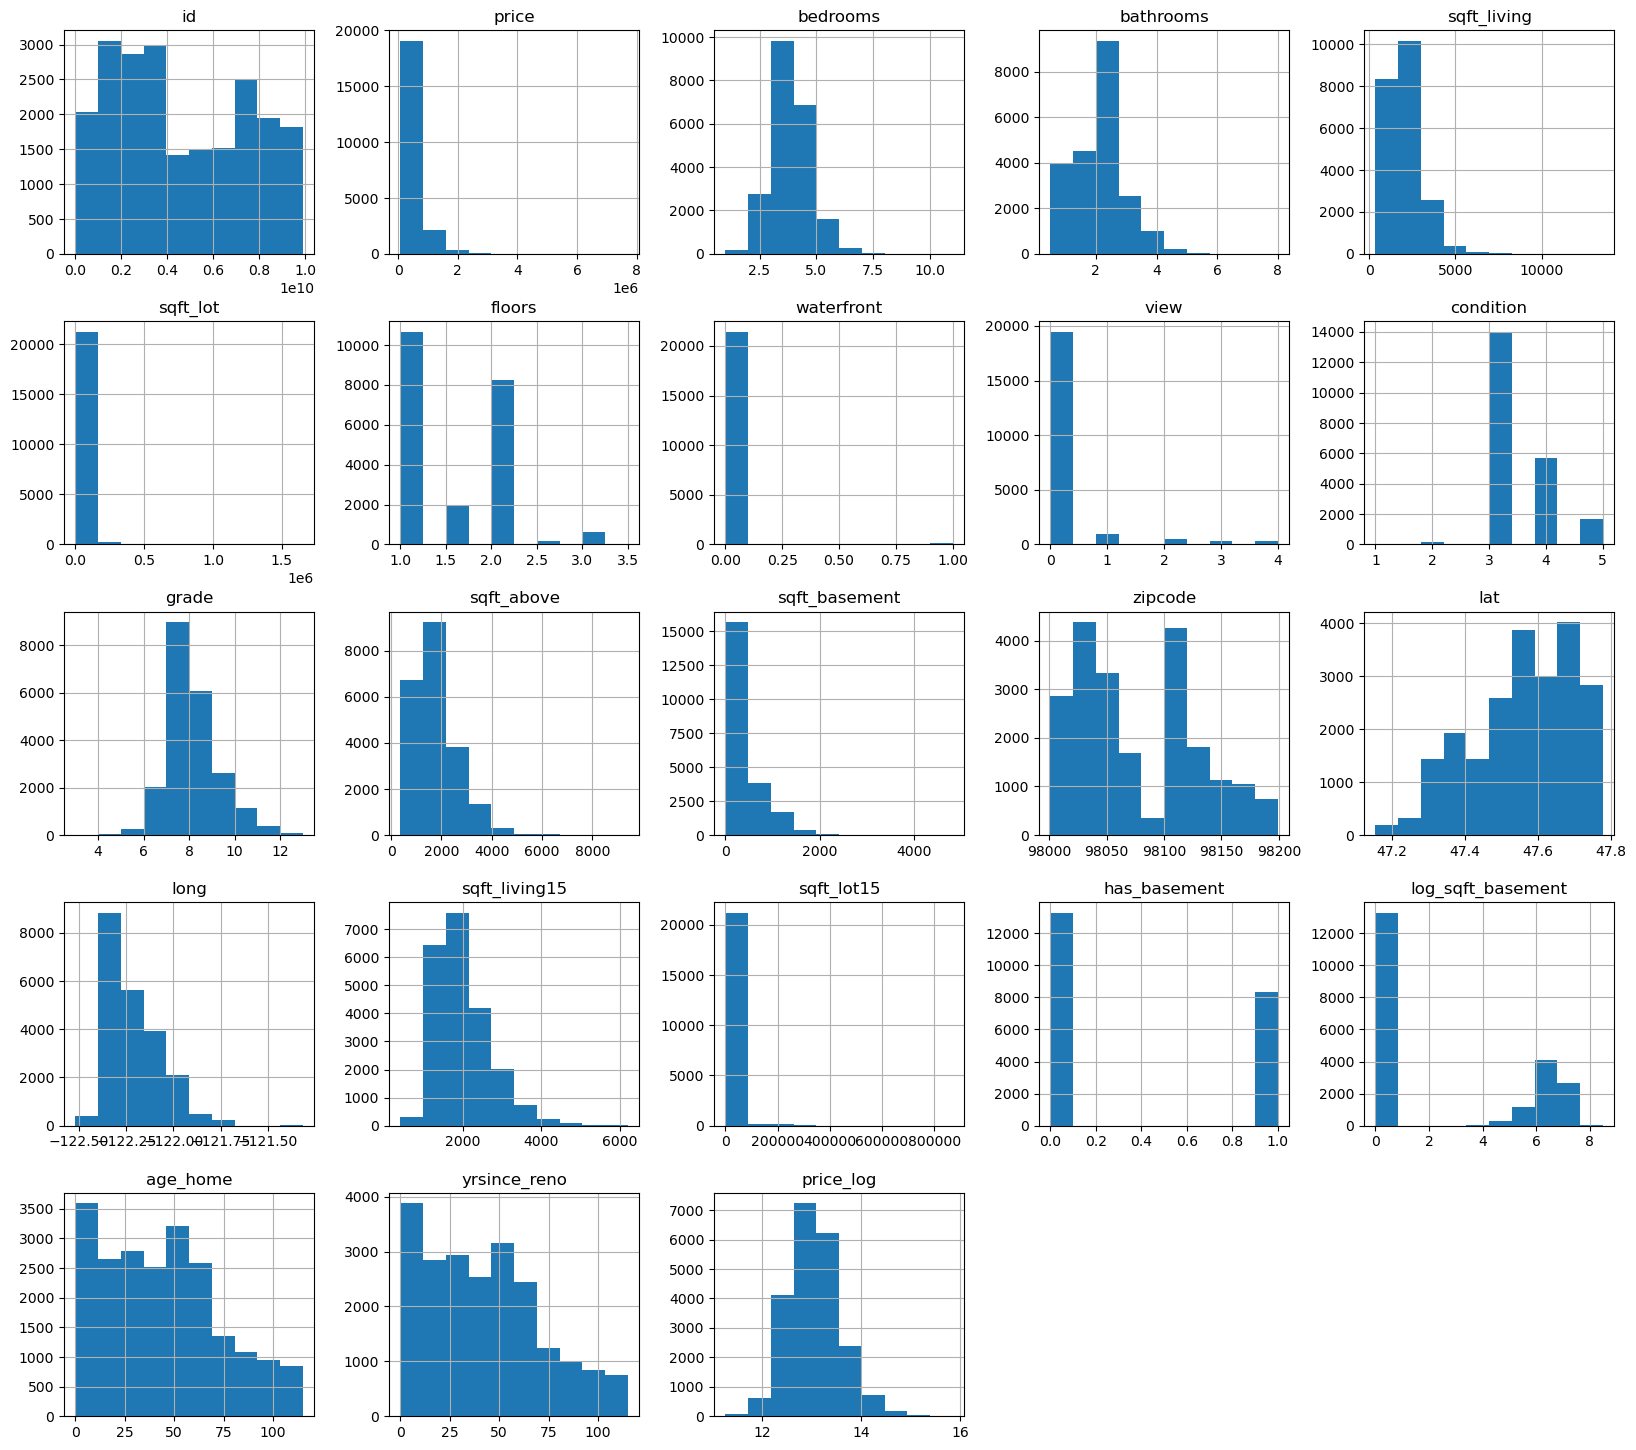

In [139]:
df.hist(figsize = (20,18));

#### Observations from the Histograms  
 **1. Price:**  

The distribution is positively skewed, with a long tail to the right. This indicates that most houses are relatively inexpensive, while a few very expensive houses pull the mean upwards. This confirms our earlier observation about the skewness of the price data.  

**2. Numerical Features:**   

`Bedrooms, Bathrooms, Floors`: These features seem to have relatively normal distributions, with most houses having a moderate number of bedrooms, bathrooms, and floors.   
`Square Footage (living, lot, above, basement, living15, lot15)`: These features also show positive skewness, with a few very large houses. This is expected for real estate data.   
`Year Built and Age Home`: These features show a historical trend, with a peak around a certain year and a decline in newer houses. This might indicate a specific construction boom or economic period.   
`Latitude and Longitude`: The distribution seems to be concentrated in a specific geographical area, with some outliers. This could be due to the specific region covered by the dataset.   

 **3. Categorical Features:**   

Waterfront, View, Condition, Grade: These features are difficult to interpret from histograms alone. Bar plots or count plots would be more suitable for visualizing categorical data.   